In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [2]:
# Import our input dataset
hoops_df = pd.read_csv('cbb.csv')
hoops_df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,Michigan St.,B10,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,...,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16,3.0,2013
2451,Arizona,P12,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,...,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16,6.0,2013
2452,Oregon,P12,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,...,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16,12.0,2013
2453,La Salle,A10,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,...,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16,13.0,2013


In [3]:
hoops_df = hoops_df.drop(["TEAM","SEED","CONF"], axis=1)
hoops_df

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,YEAR
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,...,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,2016
1,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,...,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,2015
2,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,...,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,2018
3,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,...,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,2019
4,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,...,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,19.2,36.1,...,36.6,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16,2013
2451,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,19.8,35.0,...,37.4,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16,2013
2452,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,22.0,35.8,...,38.4,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16,2013
2453,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,21.3,29.0,...,31.3,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16,2013


In [4]:
tourney_list = hoops_df['POSTSEASON'].value_counts()
tourney_list

R64          224
R32          112
S16           56
E8            28
R68           28
F4            14
2ND            7
Champions      7
Name: POSTSEASON, dtype: int64

In [5]:
tourney_list_to_replace = list(tourney_list.index)

for place in tourney_list_to_replace:
  hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(place,"1")

hoops_df['POSTSEASON'].value_counts()

1    476
Name: POSTSEASON, dtype: int64

In [6]:
hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].fillna(0)

In [7]:
hoops_df['POSTSEASON'] = pd.to_numeric(hoops_df['POSTSEASON'])

In [9]:
hoops_cat = hoops_df.dtypes[hoops_df.dtypes == "object"].index.tolist()

In [10]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(hoops_df[hoops_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(hoops_cat)
encode_df.head()

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CONF_A10,CONF_ACC,CONF_AE,CONF_ASun,CONF_Amer,CONF_B10,CONF_B12,CONF_BE,CONF_BSky,CONF_BSth,...,CONF_Pat,CONF_SB,CONF_SC,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC,CONF_ind
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
hoops_df = hoops_df.merge(encode_df, left_index=True, right_index=True)
hoops_df = hoops_df.drop(hoops_cat, 1)
hoops_df.head()

<ipython-input-11-69c6f3a9026d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hoops_df = hoops_df.drop(hoops_cat, 1)


,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,CONF_Pat,CONF_SB,CONF_SC,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC,CONF_ind
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
y = hoops_df['POSTSEASON'].values
X = hoops_df.drop(['POSTSEASON'], 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

<ipython-input-8-78dd80e915a0>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = hoops_df.drop(['POSTSEASON'], 1).values


In [9]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9299674267100977


[0.07316471 0.12795696 0.0626468  0.06608693 0.1412943  0.02520096
 0.02917056 0.02770361 0.02075266 0.01807511 0.02438448 0.02078158
 0.01760741 0.02640307 0.02608805 0.02271471 0.02260243 0.01885812
 0.21949201 0.00901553]


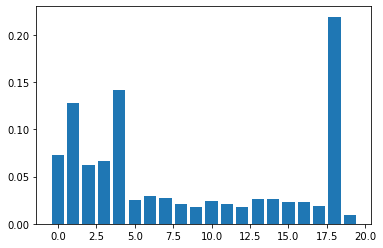

In [12]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()